In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Constant
G = 6.67430 * 10**-11

#Initial pars: mass = 10^21 kg, radius = km
mass_sun = 1.989 * 10**30
radius_sun = 0
size_sun = 695700 * 10**3

mass_mercury = 3.301 * 10 **23
radius_mercury = 57 * 10**9.
size_mercury = 2439.4 * 10**3

mass_venus = 4.867 * 10**24
radius_venus = 108 * 10**9.
size_venus = 6051.8 * 10**3

mass_earth = 5.972 *10**24
radius_earth = 150 * 10**9.
size_earth = 6371.0 * 10**3

mass_mars = 6.417 *10**23
radius_mars = 228 * 10**9.
size_mars = 3389.5 * 10**3

mass_jupiter =  1.898 *10**27
radius_jupiter = 779 * 10**9.
size_jupiter = 69911 * 10**3

mass_saturn = 5.683 * 10**26
radius_saturn = 1.43 * 10**12.
size_saturn = 58232 * 10**3

mass_uranus = 8.681 * 10**25
radius_uranus = 2.88 * 10**12.
size_uranus = 25362 * 10**3

mass_neptune = 1.024 * 10**26
radius_neptune = 4.50 * 10**12.
size_neptune = 24622 * 10**3

mass_pluto = 1.309 *10**22
radius_pluto = 5.91 * 10**12.
size_pluto = 1188.3 * 10**3

planet_properties = {
    "Sun": {"mass": mass_sun, "orbit": radius_sun, "radius": size_sun},
    "Mercury": {"mass": mass_mercury, "orbit": radius_mercury, "radius": size_mercury},
    "Venus": {"mass": mass_venus, "orbit": radius_venus, "radius": size_venus},
    "Earth": {"mass": mass_earth, "orbit": radius_earth, "radius": size_earth},
    "Mars": {"mass": mass_mars, "orbit": radius_mars, "radius": size_mars},
    "Jupiter": {"mass": mass_jupiter, "orbit": radius_jupiter, "radius": size_jupiter},
    "Saturn": {"mass": mass_saturn, "orbit": radius_saturn, "radius": size_saturn},
    "Uranus": {"mass": mass_uranus, "orbit": radius_uranus, "radius": size_uranus},
    "Neptune": {"mass": mass_neptune, "orbit": radius_neptune, "radius": size_neptune},
    "Pluto": {"mass": mass_pluto, "orbit": radius_pluto, "radius": size_pluto}
}

In [4]:
class body():
    def __init__(self, name):
        self.mass = planet_properties[name]["mass"]
        self.name = name
        self.radius = planet_properties[name]["radius"]
        self.pos = np.array([planet_properties[name]["orbit"], 0])

        if name == "Sun":
            self.vel = np.array([0, 0])
        else:
            self.vel = np.array([0, 
                             np.sqrt(G * (planet_properties["Sun"]["mass"] + planet_properties[name]["mass"])/np.linalg.norm(self.pos))])

In [5]:
def radii_matrix(system_bodies): # Replace with the (n^2 + n)/2 operations
    radii = {}
    for body_a in system_bodies:
        radii[body_a.name] = {}
        for body_b in system_bodies:
            radii[body_a.name][body_b.name] = np.linalg.norm(body_a.pos  - body_b.pos)
    return radii

In [6]:
class temp():
    def __init__(self, name, pos):
        self.name = name
        self.pos = pos


In [7]:
def evolve_system(system_bodies, dt):
    radii = radii_matrix(system_bodies)
    for body_a in system_bodies[1:]:
        acc = np.array([0,0])
        for body_b in [system_bodies[0]]:#for body_b in [i for i in system_bodies if i != body_a]:
            a_i = G * body_b.mass/radii[body_a.name][body_b.name]**2
            a_vec = body_b.pos - body_a.pos
            a_vec = a_i * a_vec/np.linalg.norm(a_vec)
        #Force components
        acc = acc + a_vec
        #Velocity change
        body_a.vel = body_a.vel + acc * dt

    for body_a in system_bodies:
        body_a.pos = body_a.pos +  body_a.vel * dt
    return system_bodies

In [11]:
system_bodies = [body(body_name) for body_name in list(planet_properties.keys())]

(-0.1, 0.1)

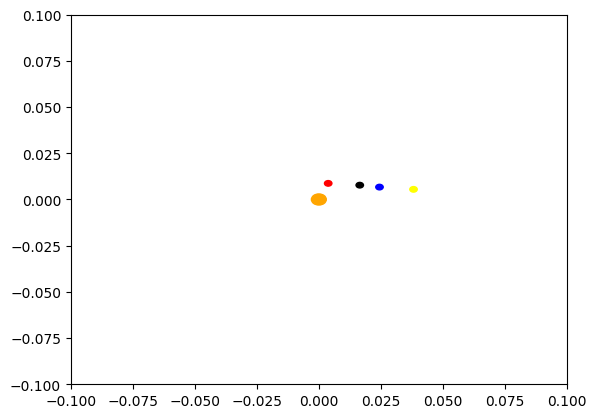

In [51]:
map_size = 0.1
sun_size = 0.003
fig, ax = plt.subplots()
sa = ["orange", "red", "black", "blue", "yellow", "tomato", "salmon", "purple", "pink", "lime"]
a = 0
for planet in evolve_system(system_bodies, 60*60*24*.1):
    ax.add_patch(plt.Circle(planet.pos/radius_pluto, radius=sun_size, color = sa[a]))
    sun_size = 0.0015
    a += 1
plt.xlim([-map_size,map_size])
plt.ylim([-map_size,map_size])